<a href="https://colab.research.google.com/github/ElFeo/raspberry-pi-os/blob/master/temp_plotting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

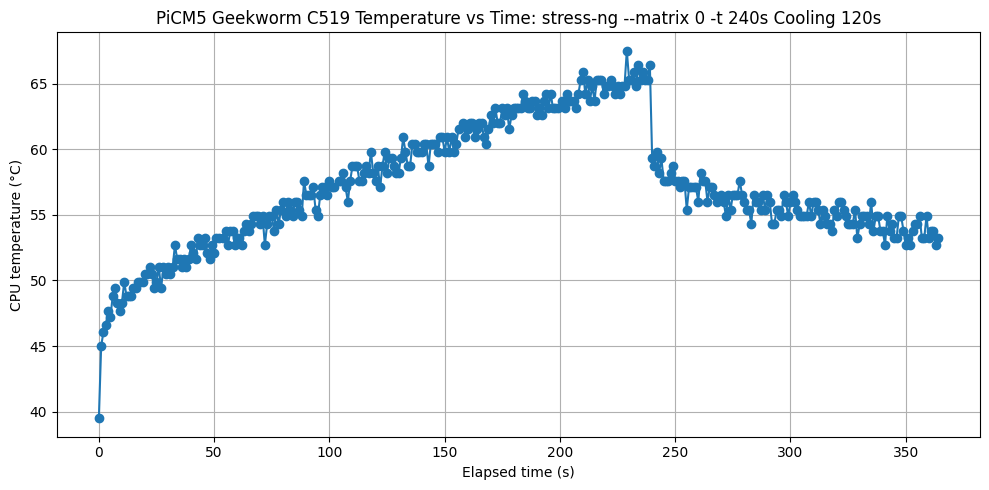

In [1]:
# 07/24/2025
import pandas as pd
import matplotlib.pyplot as plt

# Replace with the path to your CSV file.  In Colab, you can upload it or use
# drive.mount() to mount Google Drive.
# df = pd.read_csv('/content/cpu_temp_log.csv')
# df = pd.read_csv('/content/sample_data/cpu_temp_log_01.csv')
#df = pd.read_csv('/content/drive/MyDrive/cpu_temp_log_cm4_01.csv')
#df = pd.read_csv('/content/drive/MyDrive/cpu_temp_log_cm5_02.csv')
#df = pd.read_csv('/content/drive/MyDrive/cpu_temp_log_cm4_03.csv')
#df = pd.read_csv('/content/drive/MyDrive/cpu_temp_log_cm4_04.csv')
#df = pd.read_csv('/content/drive/MyDrive/cpu_temp_log_cm5_04.csv')
df = pd.read_csv('/content/drive/MyDrive/cpu_temp_log_cm5_07.csv')
# Parse the 'timestamp' column into datetime objects.
df['timestamp'] = pd.to_datetime(df['timestamp'])

# Compute elapsed time in seconds relative to the first measurement.
df['time_seconds'] = (df['timestamp'] - df['timestamp'].iloc[0]).dt.total_seconds()

# Convert temperature to numeric if necessary
df['temp_c'] = pd.to_numeric(df['temp_c'], errors='coerce')

# Create the plot
plt.figure(figsize=(10, 5))
plt.plot(df['time_seconds'], df['temp_c'], marker='o')
plt.xlabel('Elapsed time (s)')
plt.ylabel('CPU temperature (°C)')
plt.title('PiCM5 Geekworm C519 Temperature vs Time: stress-ng --matrix 0 -t 240s Cooling 120s')
plt.grid(True)
plt.tight_layout()
plt.show()


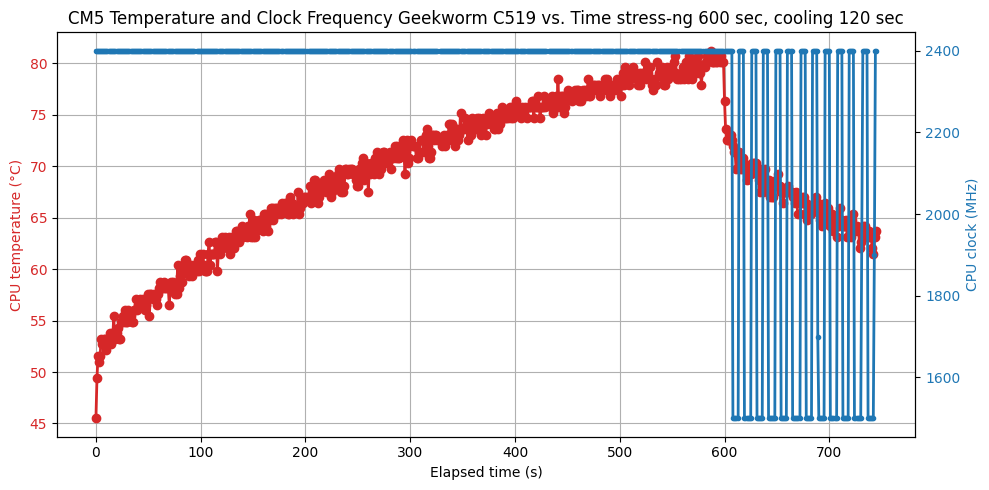

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Upload your CSV to Colab or mount your Google Drive and change the path accordingly.
#df = pd.read_csv('/content/cpu_metrics_log.csv')
# df = pd.read_csv('/content/cpu_temp_log.csv')
# df = pd.read_csv('/content/sample_data/cpu_temp_log_01.csv')
# df = pd.read_csv('/content/drive/MyDrive/cpu_temp_log_cm4_01.csv')
# df = pd.read_csv('/content/drive/MyDrive/cpu_temp_log_cm5_03.csv')
# df = pd.read_csv('/content/drive/MyDrive/cpu_temp_log_cm4_02.csv')
# df = pd.read_csv('/content/drive/MyDrive/cpu_temp_log_cm4_04.csv')
# df = pd.read_csv('/content/drive/MyDrive/cpu_temp_log_cm4_05.csv')
# df = pd.read_csv('/content/drive/MyDrive/cpu_temp_log_cm4_05.csv')
# df = pd.read_csv('/content/drive/MyDrive/cpu_temp_log_cm5_05.csv')
# df = pd.read_csv('/content/drive/MyDrive/cpu_temp_log_cm5_08.csv')
df = pd.read_csv('/content/drive/MyDrive/cpu_temp_log_cm5_09.csv')

# Parse timestamps and compute elapsed time in seconds
df['timestamp'] = pd.to_datetime(df['timestamp'])
df['elapsed_sec'] = (df['timestamp'] - df['timestamp'].iloc[0]).dt.total_seconds()

# Ensure numeric types
df['temp_c'] = pd.to_numeric(df['temp_c'], errors='coerce')
df['clock_mhz'] = pd.to_numeric(df['clock_mhz'], errors='coerce')

# Create figure and the first axis for temperature
fig, ax1 = plt.subplots(figsize=(10, 5))
ax2 = ax1.twinx()  # second axis sharing the x‑axis:contentReference[oaicite:2]{index=2}

# Plot temperature on the left y-axis
color_temp = 'tab:red'
ax1.plot(df['elapsed_sec'], df['temp_c'], color=color_temp, marker='o', linewidth=2)
ax1.set_xlabel('Elapsed time (s)')
ax1.set_ylabel('CPU temperature (°C)', color=color_temp)
ax1.tick_params(axis='y', labelcolor=color_temp)

# Plot clock frequency on the right y-axis
color_freq = 'tab:blue'
ax2.plot(df['elapsed_sec'], df['clock_mhz'], color=color_freq, marker='.', linewidth=2)
ax2.set_ylabel('CPU clock (MHz)', color=color_freq)
ax2.tick_params(axis='y', labelcolor=color_freq)

# Optional: add a title and grid
plt.title('CM5 Temperature and Clock Frequency Geekworm C519 vs. Time stress-ng 600 sec, cooling 120 sec')
ax1.grid(True)
plt.tight_layout()
plt.show()


Starting temperature: 45.00 °C
Maximum temperature: 85.10 °C


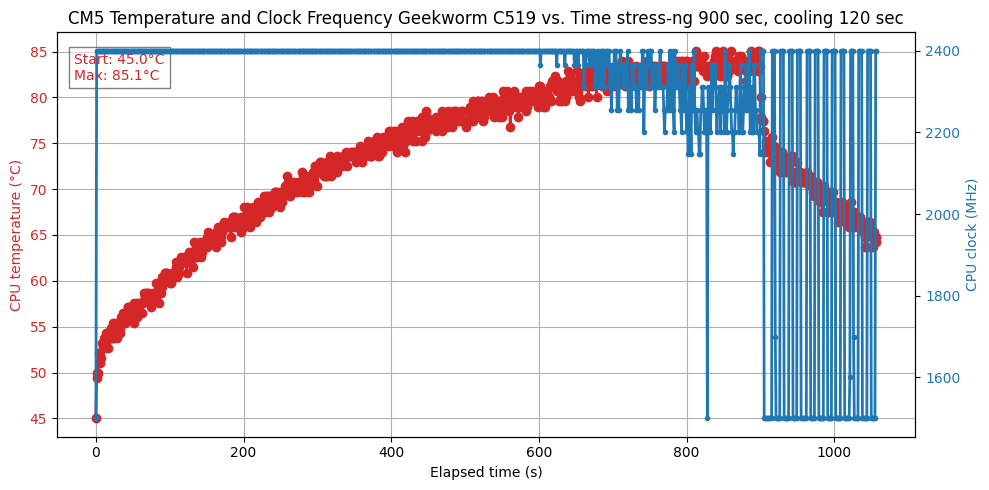

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your CSV (choose the appropriate file)
#df = pd.read_csv('/content/drive/MyDrive/cpu_temp_log_cm5_09.csv')
df = pd.read_csv('/content/drive/MyDrive/cpu_temp_log_cm5_10.csv')

# Parse timestamps and compute elapsed time in seconds
df['timestamp'] = pd.to_datetime(df['timestamp'])
df['elapsed_sec'] = (df['timestamp'] - df['timestamp'].iloc[0]).dt.total_seconds()

# Ensure numeric types
df['temp_c'] = pd.to_numeric(df['temp_c'], errors='coerce')
df['clock_mhz'] = pd.to_numeric(df['clock_mhz'], errors='coerce')

# Compute starting and maximum temperature values
start_temp = df['temp_c'].iloc[0]
max_temp = df['temp_c'].max()

# Print them to the console (optional)
print(f"Starting temperature: {start_temp:.2f} °C")
print(f"Maximum temperature: {max_temp:.2f} °C")

# Create figure and axes
fig, ax1 = plt.subplots(figsize=(10, 5))
ax2 = ax1.twinx()  # secondary Y-axis for clock frequency

# Plot temperature on the left y-axis
color_temp = 'tab:red'
ax1.plot(df['elapsed_sec'], df['temp_c'], color=color_temp, marker='o', linewidth=2)
ax1.set_xlabel('Elapsed time (s)')
ax1.set_ylabel('CPU temperature (°C)', color=color_temp)
ax1.tick_params(axis='y', labelcolor=color_temp)

# Plot clock frequency on the right y-axis
color_freq = 'tab:blue'
ax2.plot(df['elapsed_sec'], df['clock_mhz'], color=color_freq, marker='.', linewidth=2)
ax2.set_ylabel('CPU clock (MHz)', color=color_freq)
ax2.tick_params(axis='y', labelcolor=color_freq)

# Annotate starting and maximum temperatures on the chart
ax1.text(
    0.02, 0.95,
    f'Start: {start_temp:.1f}°C\nMax: {max_temp:.1f}°C',
    transform=ax1.transAxes,
    fontsize=10, color=color_temp,
    verticalalignment='top',
    bbox=dict(facecolor='white', alpha=0.5)
)

# Final touches: title and grid
plt.title('CM5 Temperature and Clock Frequency Geekworm C519 vs. Time stress-ng 900 sec, cooling 120 sec')
ax1.grid(True)
plt.tight_layout()
plt.show()
